### B. Titanic-https://www.kaggle.com/c/titanic/data
Database of whether somebody survived or not
Can you infer who has survived ?

1. Load the data
2. Which gender survived more 
3. Does it depend on pclass?
4. can we see % of survival of each gender and pclass 
What is your inference? 

### Data
col name    defination      key
survived  - survival        - 0-No,1-Yes
pclass    - Ticketclass     - 1 = 1st, 2 = 2nd, 3 = 3rd
name      - Passengername   - (lastname,title first name)/ (lastname,title husbands name (first name))
sex       - Sex             - male,female  
age       - Age                
sibsp     - of siblings / spouses aboard the Titanic
parch     - of parents / children aboard the Titanic
ticket    - Ticket number
fare      - Passenger fare
cabin     - Cabin number
embarked  - Port of Embarkation  - C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
path = r'code\data\titanic_train.csv'

In [3]:
titanic = pd.read_csv(path)

In [4]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape,titanic.size

((891, 11), 9801)

In [6]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [7]:
titanic.nunique()

survived      2
pclass        3
name        891
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64

In [8]:
 titanic['sex'].value_counts(),titanic['pclass'].value_counts()

(sex
 male      577
 female    314
 Name: count, dtype: int64,
 pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64)

## Which gender survived more

In [9]:
gender_vs_survived = titanic.groupby('sex').agg({'sex': 'count', 'survived': 'sum'})
gender_vs_survived

,sex,survived
sex,,
female,314,233
male,577,109


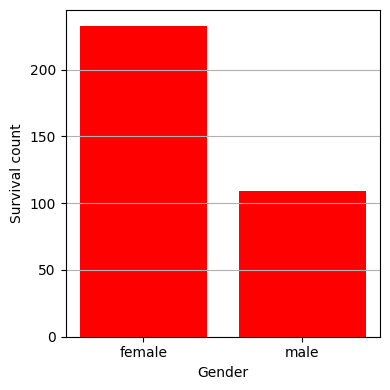

In [10]:
plt.figure(figsize=(4,4))
plt.bar(gender_vs_survived.index,gender_vs_survived.survived,color="red")
plt.xlabel('Gender')
plt.ylabel('Survival count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### gender_vs_survival

In [18]:
gender_vs_survival = titanic.groupby('sex').agg({'sex': 'count', 'survived': 'sum'})
gender_vs_survival.columns = ['total','survived']
gender_vs_survival

,total,survived
sex,,
female,314,233
male,577,109


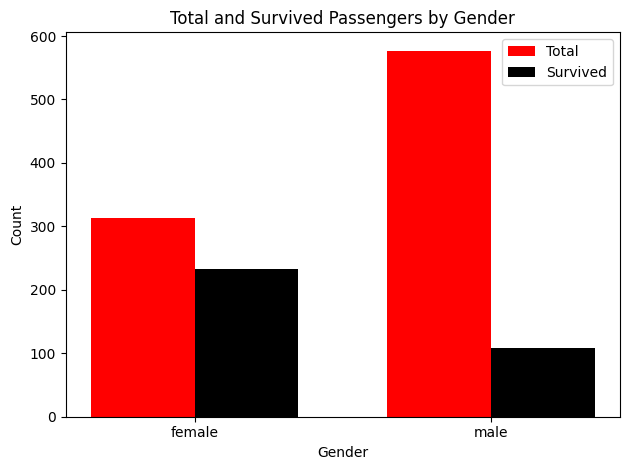

In [19]:
# gender_vs_survived - plot
labels = gender_vs_survival.index
total = gender_vs_survival['total']
survived = gender_vs_survival['survived']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, total, width, label='Total', color='red')
bars2 = ax.bar(x + width/2, survived, width, label='Survived', color='black')

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Total and Survived Passengers by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

## Does it depend on pclass?

In [12]:
pclass_vs_survial = titanic.groupby('pclass').agg({'survived':'sum'})
pclass_vs_survial

,survived
pclass,
1,136
2,87
3,119


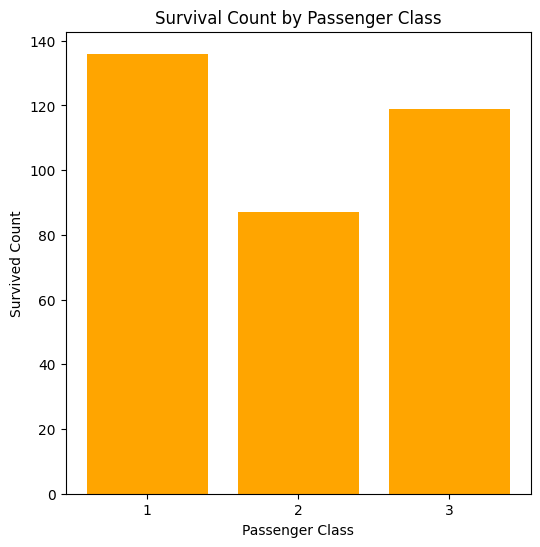

In [13]:
plt.figure(figsize=(6,6))
plt.bar(pclass_vs_survial.index,pclass_vs_survial.survived,color="orange")
plt.xticks([1, 2, 3])
plt.xlabel('Passenger Class')
plt.ylabel('Survived Count')
plt.title('Survival Count by Passenger Class')
plt.show()

#### pclass_vs_survival

In [20]:
pclass_vs_survival = titanic.groupby(['pclass']).agg({'pclass':'sum','survived':'sum'})
pclass_vs_survival.columns = ['total','survived']

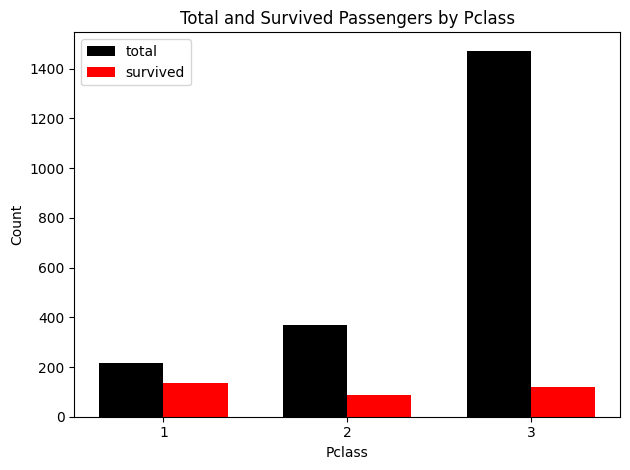

In [21]:
# pclass_vs_survived - plot
labels = pclass_vs_survival.index
total = pclass_vs_survival.total
survived = pclass_vs_survival.survived

fig,ax = plt.subplots()
width = 0.35

x = np.arange(1,4) #[1,2,3]
bar1 = ax.bar(x-width/2,total,width,label = 'total',color='black')
bar2 = ax.bar(x+width/2,survived,width,label='survived',color='red')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_title('Total and Survived Passengers by Pclass')
ax.set_xticks(x)
ax.legend()

plt.tight_layout()
plt.show()

### % of survival of each gender

In [12]:
gender_vs_survived = titanic.groupby('sex').agg({'sex': 'count', 'survived': 'sum'})
gender_vs_survived.rename(columns={'sex': 'total', 'survived': 'survived'}, inplace=True)
gender_vs_survived['%survival'] = round(gender_vs_survived['survived']/gender_vs_survived['total']*100,2)
gender_vs_survived

,total,survived,%survival
sex,,,
female,314,233,74.20
male,577,109,18.89


### % of survival of each pclass 

In [15]:
pclass_vs_survived = titanic.groupby(['pclass']).agg({'pclass':'sum','survived':'sum'})
pclass_vs_survived.columns = ['total','survived']
pclass_vs_survived['%surival'] = round(pclass_vs_survived['survived']/pclass_vs_survived['total']*100,2)
pclass_vs_survived

,total,survived,%surival
pclass,,,
1,216,136,62.96
2,368,87,23.64
3,1473,119,8.08


### pclass vs gender vs survival

In [22]:
pclass_gender_vs_survived = titanic.groupby(['pclass', 'sex', 'survived']).agg({'survived': 'count'})
pclass_gender_vs_survived.columns = ['total']
pclass_gender_vs_survived = pclass_gender_vs_survived.reset_index()
pclass_gender_vs_survived

,pclass,sex,survived,total
0,1,female,0,3
1,1,female,1,91
2,1,male,0,77
3,1,male,1,45
4,2,female,0,6
5,2,female,1,70
6,2,male,0,91
7,2,male,1,17
8,3,female,0,72
9,3,female,1,72


### % Survival of combination of pclass and gender - (pclass & gender) vs (survival)

### % Survival of each gender within each pclass among the total survived people - (female survial vs male survival in each class)

In [14]:
pclass_gender_vs_survived['group_total'] = pclass_gender_vs_survived.groupby(['pclass', 'sex'])['total'].transform('sum')
pclass_gender_vs_survived['survival%'] = round(pclass_gender_vs_survived['total']/pclass_gender_vs_survived['group_total']*100,2)
pclass_gender_vs_survived

,pclass,sex,survived,total,group_total,survival%
0,1,female,0,3,94,3.19
1,1,female,1,91,94,96.81
2,1,male,0,77,122,63.11
3,1,male,1,45,122,36.89
4,2,female,0,6,76,7.89
5,2,female,1,70,76,92.11
6,2,male,0,91,108,84.26
7,2,male,1,17,108,15.74
8,3,female,0,72,144,50.00
9,3,female,1,72,144,50.00


In [63]:
survivors = titanic.groupby(['pclass','sex']).agg({'survived':'sum'}).reset_index()
survivors['pclass_total_surviors'] = survivors.groupby(['pclass'])['survived'].transform('sum')
survivors['survival%_female_vs_male'] = round(survivors['survived']/survivors['pclass_total_surviors']*100,2)
survivors

,pclass,sex,survived,pclass_total_surviors,survival%_female_vs_male
0,1,female,91,136,66.91
1,1,male,45,136,33.09
2,2,female,70,87,80.46
3,2,male,17,87,19.54
4,3,female,72,119,60.50
5,3,male,47,119,39.50


## Inferences

### 2. Which gender survived more ?

Females survived more when compared to male.
- Out of 314 females, 233 survived - 74.20% survival rate
- Out of 577 males, only 109 were survived - 18.89% survival rate


### 3. Does it depend on pclass?

Yes, Survival depends on the passenger class(pclass)
- first class survival rate - 62.96%
- second class survival rate - 23.64%
- third class survival rate - 8.08% 
So, people who are staying the first class have more chance of survival when compare to the other two classes.

### 4. % of Survival by Gender and Pclass

First Class
- Females: 94 passengers, 91 survived - 96.8%
- Males: 122 passengers, 45 survived - 36.89%
Second Class
- Females: 76 passengers, 70 survived - 92.11%
- Males: 108 passengers, 17 survived - 15.74%
Third Class
- Females: 144 passengers, 72 survived - 50.0%
- Males: 347 passengers, 47 survived - 13.54%

### -Survivors by Gender within Each Class:

First Class Survivors: 136 total
Females: 91
Males: 45
Second Class Survivors: 87 total
Females: 70
Males: 17
Third Class Survivors: 119 total
Females: 72
Males: 47

This shows that gender and class both affect survival, 
but gender has a stronger effect, especially for females who were given priority during rescue.

### Additional inferences : 

In all three classes, females had a much higher survival rate than males.
Even in the same class, males had lower survival.
Most females in 1st and 2nd class survived. In 3rd class, about half survived.
Males survival was low in all classes, even in 1st class.